In [9]:
import scipy as sps
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append("~/bin")
# plt.rcParams['text.usetex'] = False
import multiprocessing as mp
paired = sns.color_palette("Paired")
husl = sns.color_palette("husl", 12)

size = 8
nsample = 10000

paired

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [2]:
husl

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.903599057664843, 0.511987276335809, 0.19588350060161624),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20312757197899856, 0.6881249249803418, 0.5177618167447304),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21786710662428366, 0.6656671601322255, 0.7482809385065813),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9633321742064956, 0.40643825645731757, 0.7592537599568671)]

## Power of a test

### Example of a test of mean of a normal distribution of known variance
Assume variance 1, test if a sample is drawn from a normal distribution of mean $\mu$

Examine sample size 10 and 20. Construct test statistics $$\bar{x} = \frac{1}{n}\sum_i x_i. $$ The pdf of $\bar{x}$ is $$ f(\bar{x}; \lambda) = \frac{\sqrt{n}}{\sqrt{2\pi}\sigma} \exp\left[-\frac{n}{2\sigma^2} (\bar{x} - \lambda)^2 \right] $$

For simplicity let $\sigma = 1$, and $\lambda_0=0$. 

Construct 4 critical regions:
1. Two-tailed critical region
$S_c = (-\infty, \lambda') \cup  (\lambda'', \infty)$ such that $\int_{-\infty}^{\lambda'} f(\bar{x}, \lambda_0) d\bar{x} = \int^{\infty}_{\lambda''} f(\bar{x}, \lambda_0) d\bar{x} = \alpha/2 $
In our example, this critical region is symmetric, $\lambda''(n=10) = -\lambda'(n=10) = 0.6198$ and $\lambda''(n=20) = -\lambda'(n=20) = 0.4383$
2. One-tailed critical region
$S_c = (-\infty, \lambda') $ such that $\int_{-\infty}^{\lambda'} f(\bar{x}, \lambda_0) d\bar{x} = \alpha $. 
$\lambda(n=10) = 0.5201$ and $\lambda(n=20) = 0.3678$
3. Central critical region
$S_c = (-\lambda', \lambda'') $ such that $\int_{-\lambda'}^{\lambda''} f(\bar{x}, \lambda_0) d\bar{x} = \alpha $
$\lambda(n=10) = 0.0198$ and $\lambda(n=20) = 0.014$

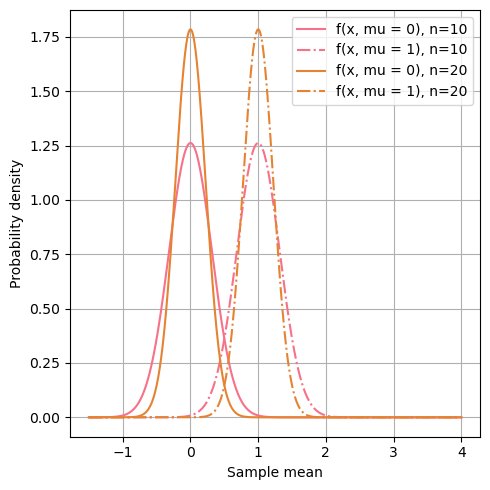

In [8]:
# plot the PDF under lambda0 and lambda1. Let lambda1 = 1

x = np.linspace(-1.5,4,1000)

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i, n in enumerate([10, 20]):
    ax.plot(x, sps.stats.norm.pdf(x, 0, 1/np.sqrt(n)), color=husl[i], label=f"f(x, mu = 0), n={n}", linestyle='solid')
    ax.plot(x, sps.stats.norm.pdf(x, 1, 1/np.sqrt(n)), color=husl[i], label=f"f(x, mu = 1), n={n}", linestyle='dashdot')

ax.grid()
ax.legend()
ax.set_xlabel("Sample mean")
ax.set_ylabel("Probability density")


plt.tight_layout()
plt.show()

In [45]:
# store all three power function for comparison

power_fns = []

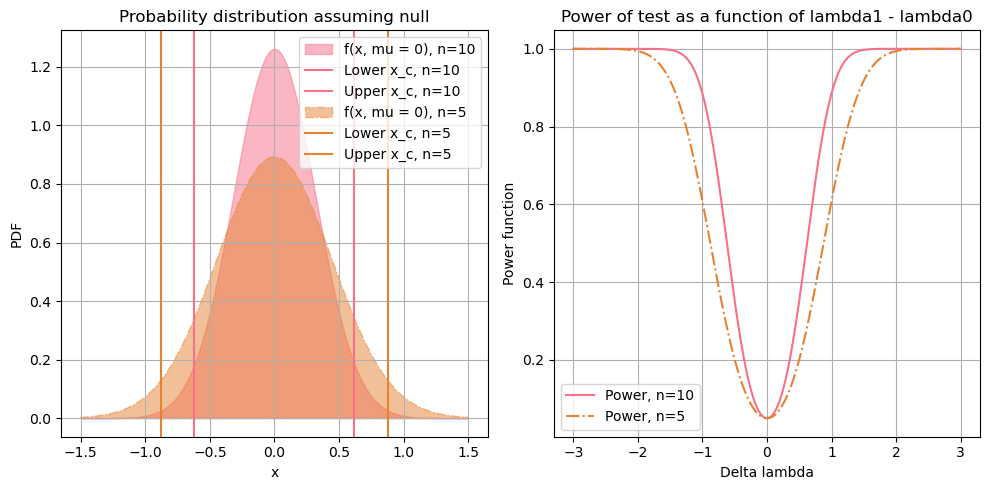

In [ ]:
# plot the power as a function of lambda1 for the first test

x = np.linspace(-1.5,1.5,1000)
lambda_0 = 0
lambda_1 = np.linspace(-3,3,300)

# the power is the probability of the test statistics falling into the critical region assuming the alternative hypothesis is true
# in the first test, it is a two-tailed probability of x_bar < -lambda'  or x_bar > lambda''
power = (sps.stats.norm.cdf(-0.6198, lambda_1, 1/np.sqrt(10)) + sps.stats.norm.sf(0.6198, lambda_1, 1/np.sqrt(10)))

fig, ax = plt.subplots(1,2,figsize=(5*2,5))
for i, conf in enumerate([(10, 'solid'), (5, 'dashdot')]):
    n, linestyle = conf
    x_c_left = sps.stats.norm.isf(0.975, lambda_0, 1/np.sqrt(n))
    x_c_right = sps.stats.norm.isf(0.025, lambda_0, 1/np.sqrt(n))
    # print(x_c_left, x_c_right)
    power = sps.stats.norm.cdf(x_c_left, lambda_1, 1/np.sqrt(n)) + sps.stats.norm.sf(x_c_right, lambda_1, 1/np.sqrt(n))
    if i == 0:
        power_fns.append(power)
    ax[1].plot(lambda_1 - lambda_0, power, color=husl[i], label=f"Power, n={n}", linestyle=linestyle)
    ax[0].fill_between(x, sps.stats.norm.pdf(x, 0, 1/np.sqrt(n)), color=husl[i], label=f"f(x, mu = 0), n={n}", linestyle=linestyle, alpha=0.5)
    ax[0].axvline(x_c_left, label=f"Lower x_c, n={n}", color=husl[i])
    ax[0].axvline(x_c_right, label=f"Upper x_c, n={n}", color=husl[i])


ax[1].set_title("Power of test as a function of lambda1 - lambda0")
ax[1].set_xlabel("Delta lambda")
ax[1].set_ylabel("Power function")
ax[0].set_title("Probability distribution assuming null")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF")

for a in ax:
    a.grid()
    a.legend()


plt.tight_layout()
plt.show()

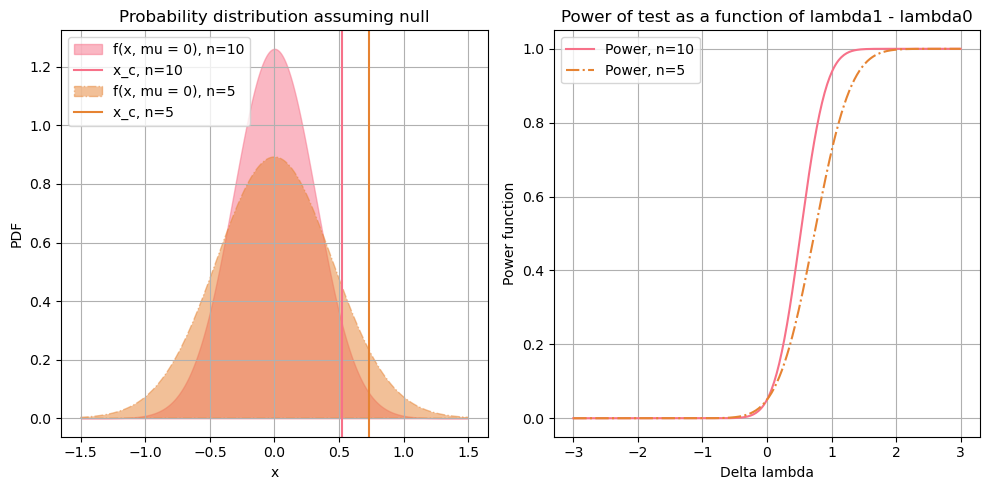

In [ ]:
# plot the power as a function of lambda1 for the second test

x = np.linspace(-1.5,1.5,1000)
lambda_0 = 0
lambda_1 = np.linspace(-3,3,300)

# the power is the probability of the test statistics falling into the critical region assuming the alternative hypothesis is true
# in the first test, it is a two-tailed probability of x_bar < -lambda'  or x_bar > lambda''
power = (sps.stats.norm.cdf(-0.6198, lambda_1, 1/np.sqrt(10)) + sps.stats.norm.sf(0.6198, lambda_1, 1/np.sqrt(10)))

fig, ax = plt.subplots(1,2,figsize=(5*2,5))
for i, conf in enumerate([(10, 'solid'), (5, 'dashdot')]):
    n, linestyle = conf
    # x_c_left = sps.stats.norm.isf(0.975, lambda_0, 1/np.sqrt(n))
    x_c_right = sps.stats.norm.isf(0.05, lambda_0, 1/np.sqrt(n))
    # print(x_c_left, x_c_right)
    power = sps.stats.norm.sf(x_c_right, lambda_1, 1/np.sqrt(n))
    if i == 0:
        power_fns.append(power)
    ax[1].plot(lambda_1 - lambda_0, power, color=husl[i], label=f"Power, n={n}", linestyle=linestyle)
    ax[0].fill_between(x, sps.stats.norm.pdf(x, 0, 1/np.sqrt(n)), color=husl[i], label=f"f(x, mu = 0), n={n}", linestyle=linestyle, alpha=0.5)
    ax[0].axvline(x_c_right, label=f"x_c, n={n}", color=husl[i])


ax[1].set_title("Power of test as a function of lambda1 - lambda0")
ax[1].set_xlabel("Delta lambda")
ax[1].set_ylabel("Power function")
ax[0].set_title("Probability distribution assuming null")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF")

for a in ax:
    a.grid()
    a.legend()


plt.tight_layout()
plt.show()

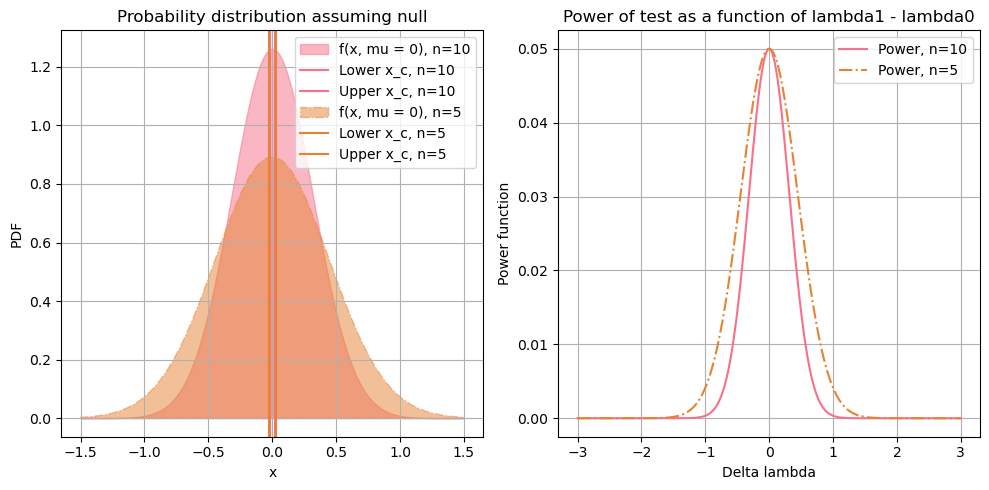

In [ ]:
# plot the power as a function of lambda1 for the third test

x = np.linspace(-1.5,1.5,1000)
lambda_0 = 0
lambda_1 = np.linspace(-3,3,300)

# the power is the probability of the test statistics falling into the critical region assuming the alternative hypothesis is true
# in the first test, it is a two-tailed probability of x_bar < -lambda'  or x_bar > lambda''
power = (sps.stats.norm.cdf(-0.6198, lambda_1, 1/np.sqrt(10)) + sps.stats.norm.sf(0.6198, lambda_1, 1/np.sqrt(10)))

fig, ax = plt.subplots(1,2,figsize=(5*2,5))
for i, conf in enumerate([(10, 'solid'), (5, 'dashdot')]):
    n, linestyle = conf
    x_c_left = sps.stats.norm.isf(1-(0.5-0.025), lambda_0, 1/np.sqrt(n))
    x_c_right = sps.stats.norm.isf(1-(0.5+0.025), lambda_0, 1/np.sqrt(n))
    # print(x_c_left, x_c_right)
    power = 1 - (sps.stats.norm.cdf(x_c_left, lambda_1, 1/np.sqrt(n))  + sps.stats.norm.sf(x_c_right, lambda_1, 1/np.sqrt(n)))
    if i == 0:
        power_fns.append(power)
    ax[1].plot(lambda_1 - lambda_0, power, color=husl[i], label=f"Power, n={n}", linestyle=linestyle)
    ax[0].fill_between(x, sps.stats.norm.pdf(x, 0, 1/np.sqrt(n)), color=husl[i], label=f"f(x, mu = 0), n={n}", linestyle=linestyle, alpha=0.5)
    ax[0].axvline(x_c_left, label=f"Lower x_c, n={n}", color=husl[i])
    ax[0].axvline(x_c_right, label=f"Upper x_c, n={n}", color=husl[i])


ax[1].set_title("Power of test as a function of lambda1 - lambda0")
ax[1].set_xlabel("Delta lambda")
ax[1].set_ylabel("Power function")
ax[0].set_title("Probability distribution assuming null")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF")

for a in ax:
    a.grid()
    a.legend()


plt.tight_layout()
plt.show()

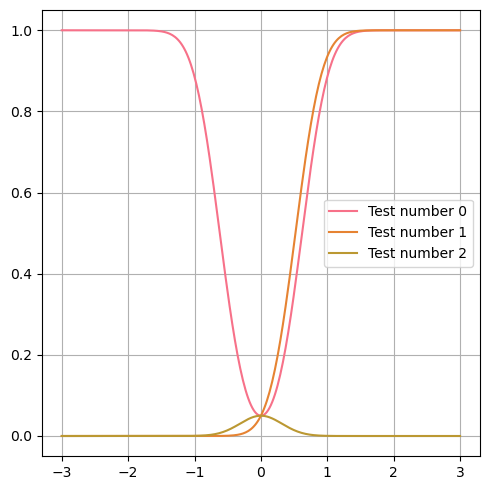

In [51]:
# plot all power functions

fig, ax = plt.subplots (1,1, figsize = (5,5))

for i, power in enumerate(power_fns) :
    ax.plot(lambda_1 - lambda_0, power, label=f"Test number {i}", color=husl[i])


ax.grid()
ax.legend()
plt.tight_layout()
plt.show()